# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

1. Best subset selection 4/4
2. Forward and backwards stepwise selection 3/3
3. Training and test error 3/3

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [ ]:
# WRITE YOUR CODE HERE
set.seed(15)
SAMPLE_SIZE = 100

beta_0 = 4
beta_1 = 3
beta_2 = 2
beta_3 = 1


X = rnorm(SAMPLE_SIZE)
epsilon = rnorm(SAMPLE_SIZE, sd = 0.5)

Y = beta_0 + beta_1 * X + beta_2 * X^2 + beta_3 * X^3 + epsilon

print(Y)


  [1]  4.9077727 22.3242930  2.5686140  9.7564056  6.5961489  1.2399630
  [7]  4.1720627 11.4103727  2.3425351  2.0519868  8.2154905  3.4346498
 [13]  4.6254332  1.6442068 15.9113506  4.2951013  3.1840370  3.8685483
 [19]  2.1601688  2.7422956 14.4591148 15.2138048  2.9325600  3.1981682
 [25]  9.3571402  5.7639683  8.1667551  2.8514968  4.9917621  8.2980540
 [31]  1.6744976  3.5907124 16.4069957  7.5220425 10.8415323  5.6382895
 [37]  3.5011217  9.9986919  1.8496372  1.6112454  5.3432075  7.5617451
 [43] 37.9513408  0.8665062  3.2042873 13.3339586  2.3814026 17.5681046
 [49]  6.4949215  9.6257512  7.1991813  9.9340439  3.5338755 19.7014800
 [55]  4.5808425  2.1406425  1.4936806  5.1628285 11.7956467  3.4664099
 [61]  4.5041449  3.4304416  2.0584797  1.3260005  0.6633195  1.6825390
 [67]  3.0396699  5.2219871  2.5250251 13.0242144  0.2694022 -0.9867664
 [73]  1.0574946  3.7667363  4.0691948  2.3961219  6.4226947 10.5457093
 [79]  2.4740074 27.7377572  4.1903847 35.1487378  4.8723272  2.

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [ ]:
# WRITE YOUR CODE HERE
# install.packages("leaps")# Uncomment if you haven't installed the leaps package yet
library(leaps)
# ?regsubsets # uncomment to learn more about regsubsets function

# Prepare the dataframe:
X_matrix <- sapply(1:10, function(i) X^i)
# Add column names for clarity
colnames(X_matrix) <- paste0("X_", 1:10)

# Instead of using a dataframe, we use x, y arguments here, which is also supported by regsubsets
reg <- regsubsets(x = X_matrix, y = Y, nvmax = 10)
reg.summary <- summary(reg)
print(reg.summary)

Subset selection object
10 Variables  (and intercept)
     Forced in Forced out
X_1      FALSE      FALSE
X_2      FALSE      FALSE
X_3      FALSE      FALSE
X_4      FALSE      FALSE
X_5      FALSE      FALSE
X_6      FALSE      FALSE
X_7      FALSE      FALSE
X_8      FALSE      FALSE
X_9      FALSE      FALSE
X_10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X_1 X_2 X_3 X_4 X_5 X_6 X_7 X_8 X_9 X_10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " " 
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " " 
6  ( 1 )  "*" " " "*" "*" " " "*" " " "*" " " "*" 
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*" 
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*" 
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*" 
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*" 


Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.

Otherwise you can either delete this cell or leave it blank.

```
Subset selection object
10 Variables  (and intercept)
     Forced in Forced out
X_1      FALSE      FALSE
X_2      FALSE      FALSE
X_3      FALSE      FALSE
X_4      FALSE      FALSE
X_5      FALSE      FALSE
X_6      FALSE      FALSE
X_7      FALSE      FALSE
X_8      FALSE      FALSE
X_9      FALSE      FALSE
X_10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X_1 X_2 X_3 X_4 X_5 X_6 X_7 X_8 X_9 X_10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  "*" "*" " " " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" " " "*" "*" " " "*" " " "*" " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

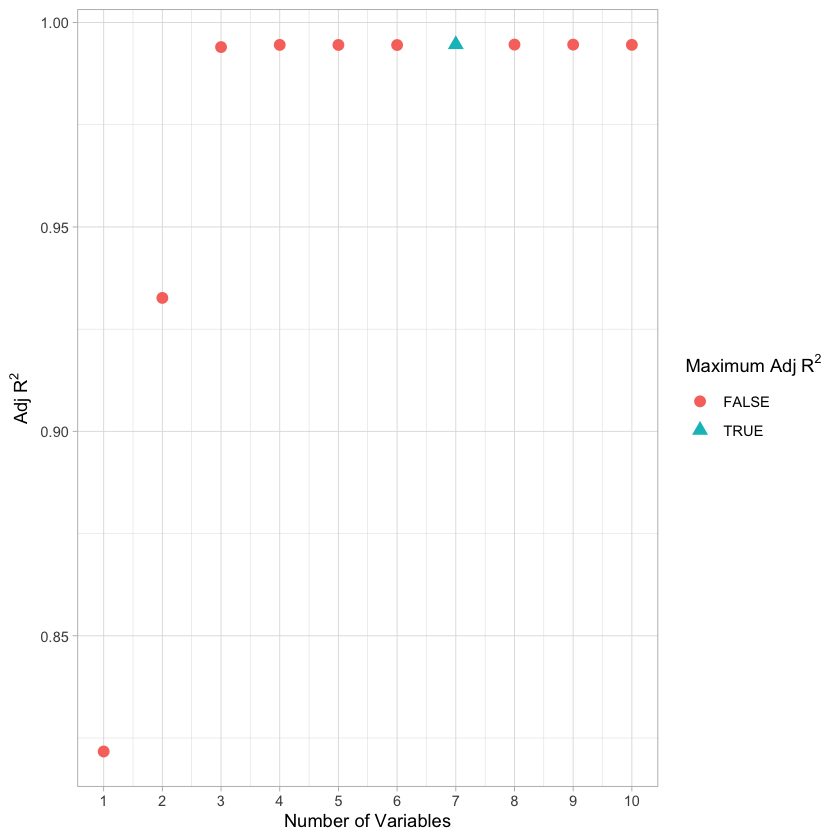

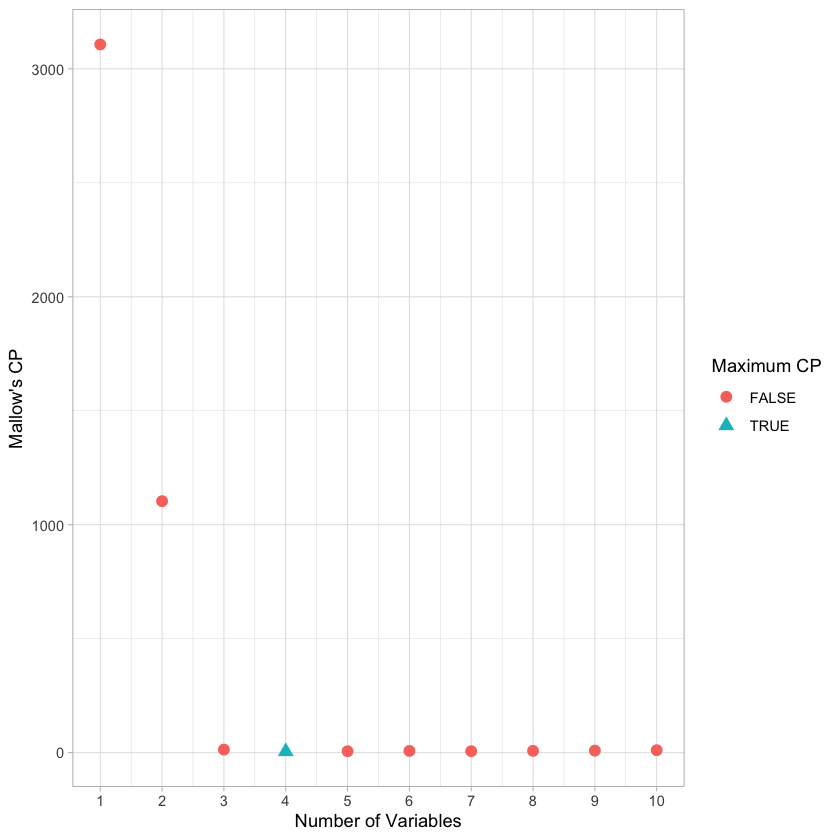

 (Intercept)          X_1          X_2          X_3          X_6 
 3.784805806  3.015983446  2.250433156  0.995402746 -0.008650362 


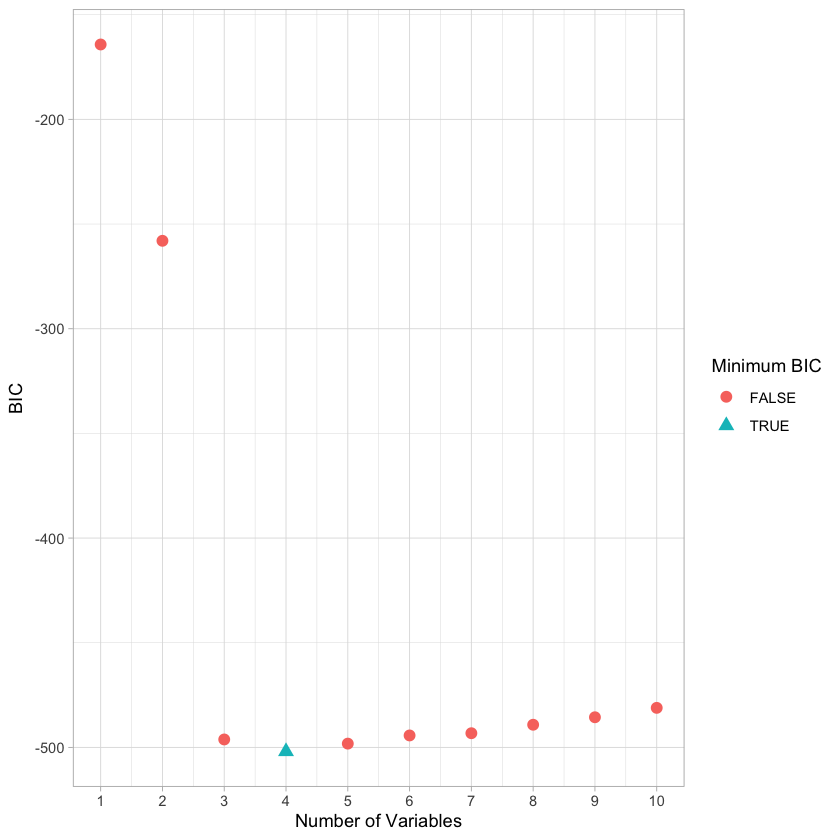

In [ ]:
# WRITE YOUR CODE HERE
# Uncomment the model fit measures you want to look at.
require(tidyverse)


numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19.
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

# #rss
# rss.df <- data.frame(numvar = numvar, rss = reg.summary$rss, minrss = allfalse)
# rss.df$minrss[which.min(reg.summary$rss)] <- TRUE
# ggplot(rss.df,aes(x=numvar,y=rss,shape=minrss,col=minrss)) +
#     geom_point(size=3) + theme_light() +
#     labs(x = "Number of Variables", y = "RSS", color="Minimum RSS", shape="Minimum RSS") +
#     scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))  # Set breaks to integers

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2) +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP") +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC") +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

# Find the index of the model with the lowest BIC
best_bic_index <- which.min(reg.summary$bic)
# Extract coefficients of the best model
best_model_coefficients <- coef(reg, best_bic_index)
# Step 3: Display the coefficients
print(best_model_coefficients)



> *Write your response here*
>
> Any number of variables $\geq3$ appeared to perform well withou much difference. Only Minimum BIC indicated a slight advantage of having 4 variables.
>
> The "best" model is shown below:
> | (Intercept) |   X_1 |   X_2 |   X_3 | X_6 |
> |-------------|-------|-------|-------|-----|
> |3.784805806  |3.015983446 | 2.250433156 | 0.995402746 | -0.008650362

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

Subset selection object
10 Variables  (and intercept)
     Forced in Forced out
X_1      FALSE      FALSE
X_2      FALSE      FALSE
X_3      FALSE      FALSE
X_4      FALSE      FALSE
X_5      FALSE      FALSE
X_6      FALSE      FALSE
X_7      FALSE      FALSE
X_8      FALSE      FALSE
X_9      FALSE      FALSE
X_10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X_1 X_2 X_3 X_4 X_5 X_6 X_7 X_8 X_9 X_10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " " 
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " " 
6  ( 1 )  "*" "*" "*" " " "*" "*" "*" " " " " " " 
7  ( 1 )  "*" "*" "*" " " "*" "*" "*" " " "*" " " 
8  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" "*" " " 
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " " 
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*" 


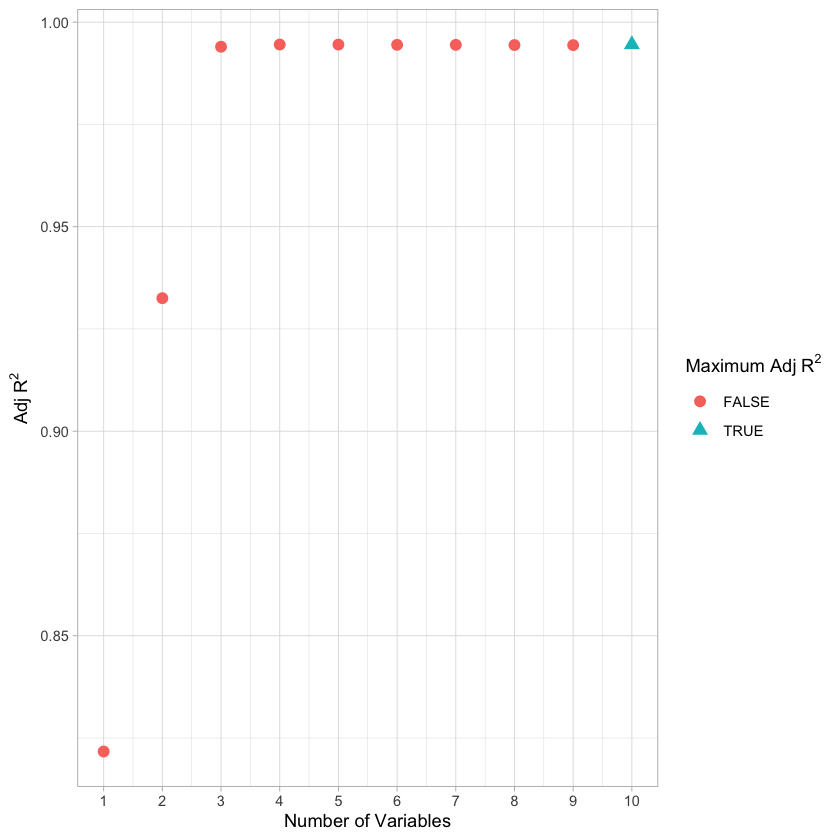

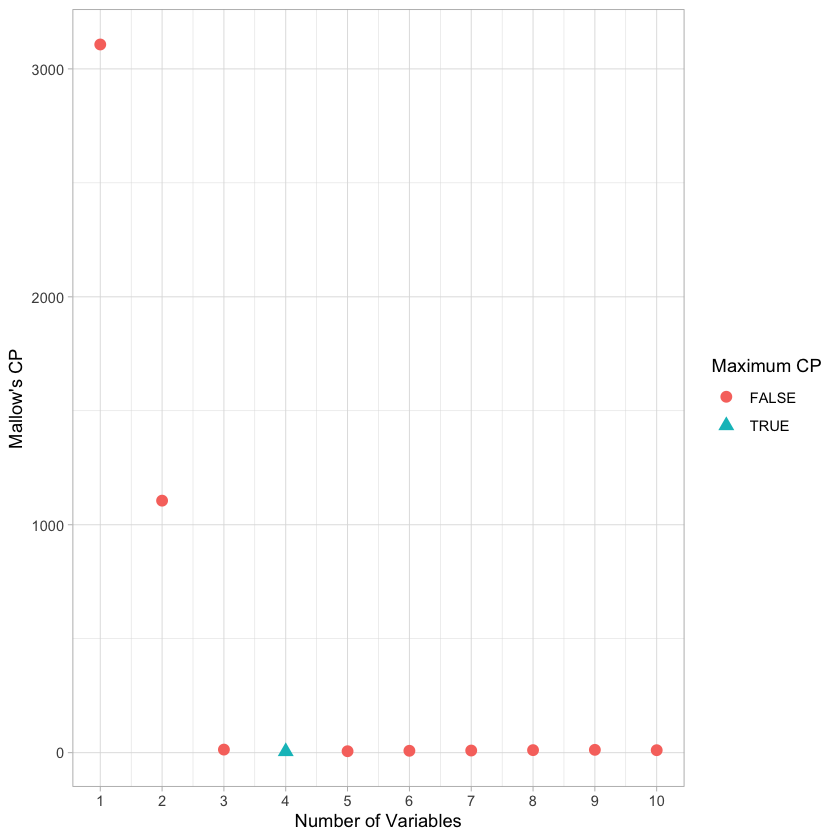

 (Intercept)          X_1          X_2          X_3          X_6 
 3.784805806  3.015983446  2.250433156  0.995402746 -0.008650362 


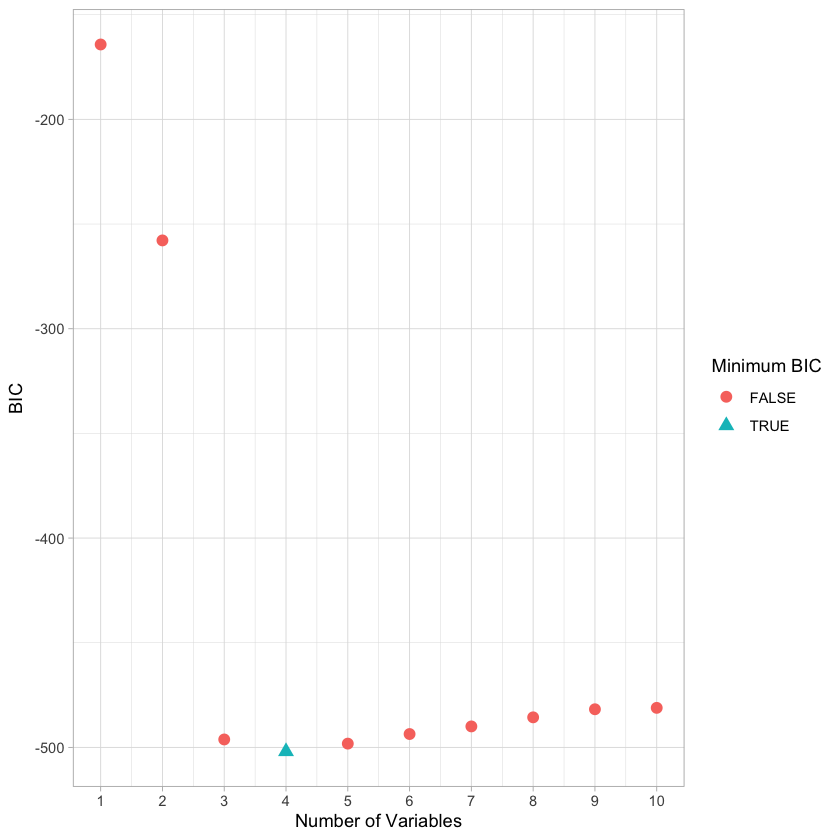

In [ ]:
# WRITE YOUR CODE HERE
regf <- regsubsets(x = X_matrix, y = Y, nvmax = 10, method = 'forward')
regf.summary <- summary(regf)
print(regf.summary)


numvar = 1:length(regf.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19.
allfalse = rep(FALSE,length(regf.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- regf.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regf.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2) +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- regf.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(regf.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP") +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

#bic
bic.df <- data.frame(numvar = numvar,bic <- regf.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regf.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC") +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

# Find the index of the model with the lowest BIC
best_bic_index <- which.min(regf.summary$bic)
# Extract coefficients of the best model
best_model_coefficients <- coef(regf, best_bic_index)
# Step 3: Display the coefficients
print(best_model_coefficients)

b) Backwards stepwise selection:

Subset selection object
10 Variables  (and intercept)
     Forced in Forced out
X_1      FALSE      FALSE
X_2      FALSE      FALSE
X_3      FALSE      FALSE
X_4      FALSE      FALSE
X_5      FALSE      FALSE
X_6      FALSE      FALSE
X_7      FALSE      FALSE
X_8      FALSE      FALSE
X_9      FALSE      FALSE
X_10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X_1 X_2 X_3 X_4 X_5 X_6 X_7 X_8 X_9 X_10
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " " 
2  ( 1 )  "*" " " " " "*" " " " " " " " " " " " " 
3  ( 1 )  "*" " " "*" "*" " " " " " " " " " " " " 
4  ( 1 )  "*" " " "*" "*" " " "*" " " " " " " " " 
5  ( 1 )  "*" " " "*" "*" " " "*" " " "*" " " " " 
6  ( 1 )  "*" " " "*" "*" " " "*" " " "*" " " "*" 
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*" 
8  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" " " "*" 
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*" 
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*" 


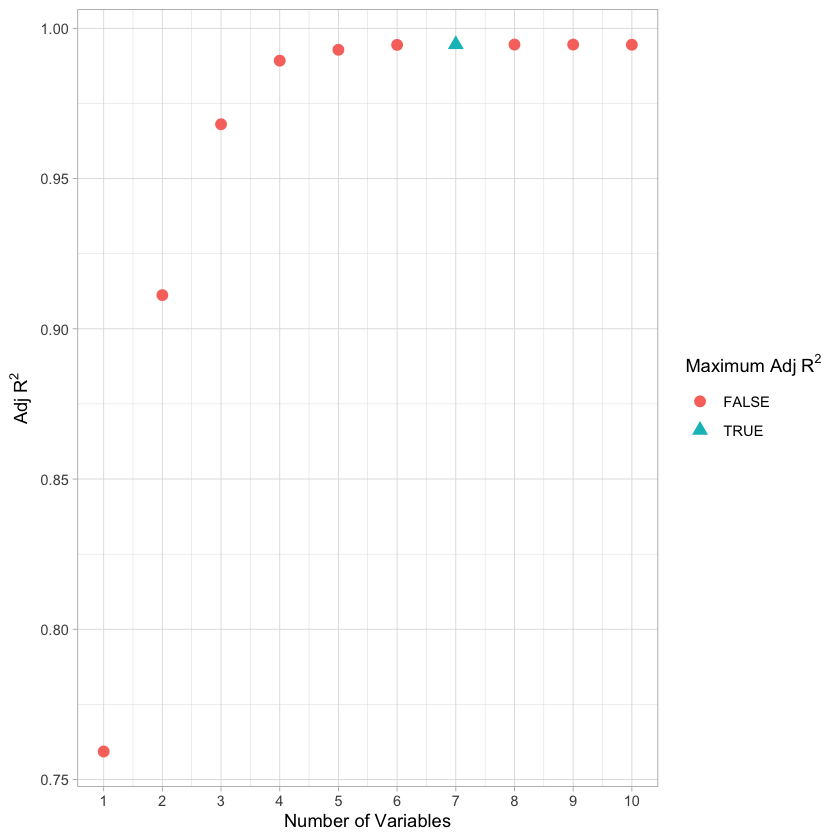

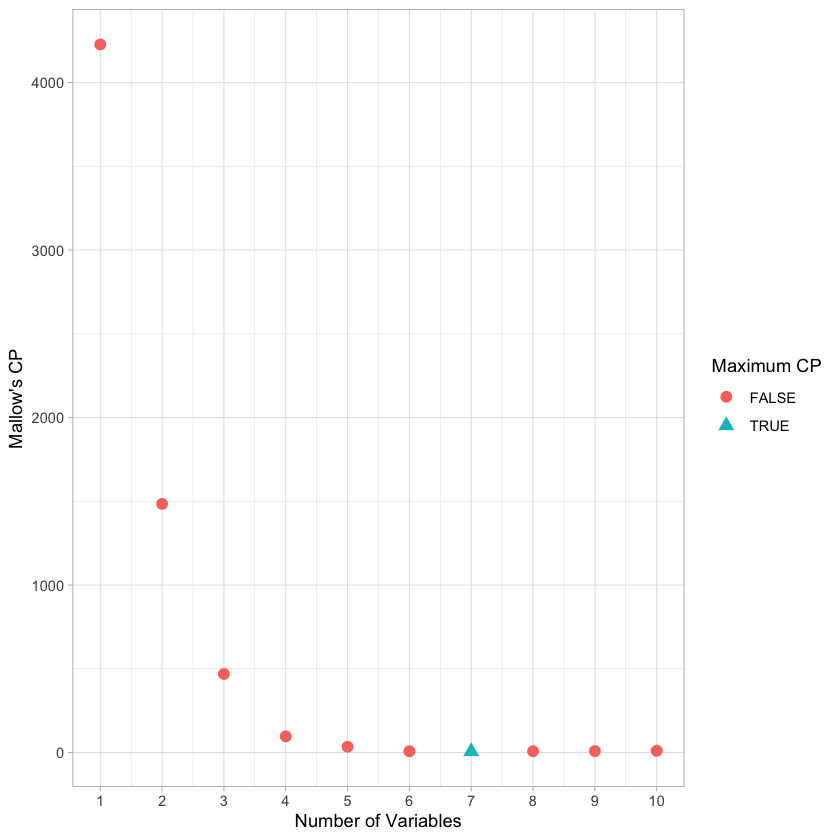

(Intercept)         X_1         X_3         X_4         X_6         X_8 
 4.04673405  3.01957373  1.00216874  3.19418647 -1.61234190  0.32390030 
       X_10 
-0.02251281 


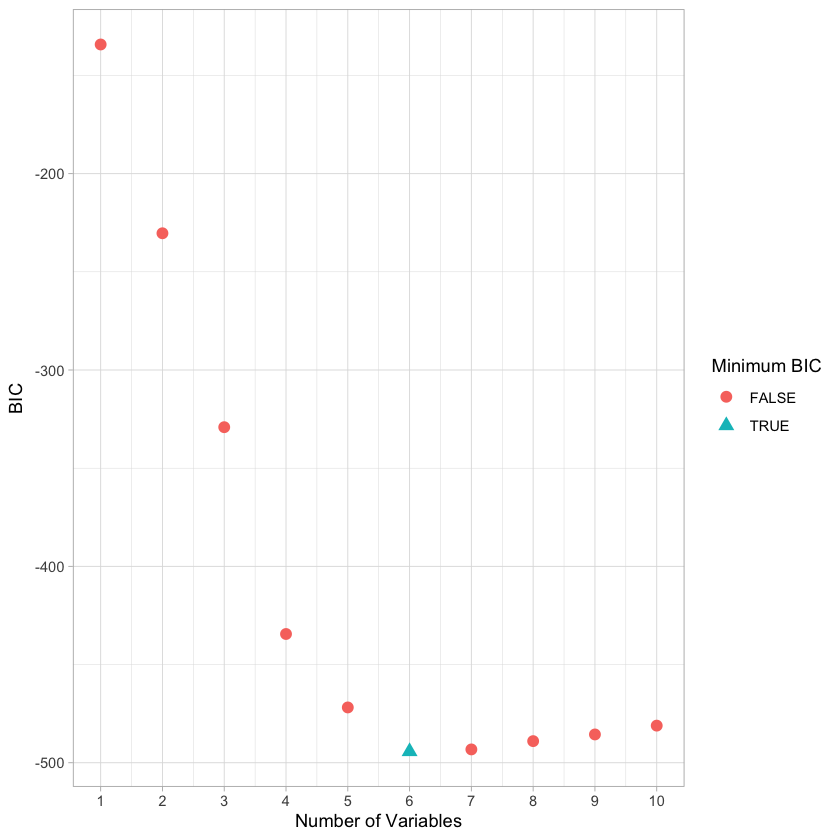

In [ ]:
# WRITE YOUR CODE HERE
regb <- regsubsets(x = X_matrix, y = Y, nvmax = 10, method = 'backward')
regb.summary <- summary(regb)
print(regb.summary)


numvar = 1:length(regb.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19.
allfalse = rep(FALSE,length(regb.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- regb.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regb.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2) +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- regb.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(regb.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP") +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

#bic
bic.df <- data.frame(numvar = numvar,bic <- regb.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regb.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC") +
    scale_x_continuous(breaks = seq(0, numvar[length(numvar)], by = 1))

# Find the index of the model with the lowest BIC
best_bic_index <- which.min(regb.summary$bic)
# Extract coefficients of the best model
best_model_coefficients <- coef(regb, best_bic_index)
# Step 3: Display the coefficients
print(best_model_coefficients)

c) Compare your results from parts a and b with those of question 1.

> *Write your response here*
>
> I used Minimum BIC as the criterion. `exhaustive` and `forward` selection yielded the same model, while `backward` produced a more complex one.

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=900$ observations and a test set containing $n=100$ observations.

<span style="background-color:yellow; color: black; font-style:bold">Note: originally the text said "a training set containing n=100 observations and a test set containing n=900 observations," which seems to be the other way around? I'm proceeding with n=900 for training set since the training set is usually larger than the test set. The iteration would be less meaningful with such a small training set. </span>

In [ ]:
# WRITE YOUR CODE HERE
# Set seed for reproducibility
set.seed(1)

# Number of observations and features
n <- 1000
p <- 20

# Simulate the feature matrix X (independent variables)
X <- matrix(rnorm(n * p), nrow = n, ncol = p)

# Generate the response variable Y
beta <- c(runif(5, -2, 2), rep(0, 15))  # 5 non-zero elements, 15 zeros
epsilon <- rnorm(n)
Y <- X %*% beta + epsilon    # %*% is the matrix multiplication operator

# Combine X and Y into a single dataset
sim_data <- data.frame(Y = Y, X)

# Split the dataset into training and test sets
# Randomly select 100 observations for training

train_indices <- sample(1:n, size = 900) # USING 900 DATA POINTS FOR TRAINING!!!
train_set <- sim_data[train_indices, ]
test_set <- sim_data[-train_indices, ]

# View the dimensions of the training and test sets
print(dim(train_set))  # Should be 900 x 21 (20 features + response)
print(dim(test_set))   # Should be 100 x 21



[1] 900  21
[1] 100  21


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(Y ~ ., data = train_set, nvmax = p)
20 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " " " " " " " "*" " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " "*" "*" " " " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  "*" " " " " "*" "*" " " " " " " " " " " " " " " " " 

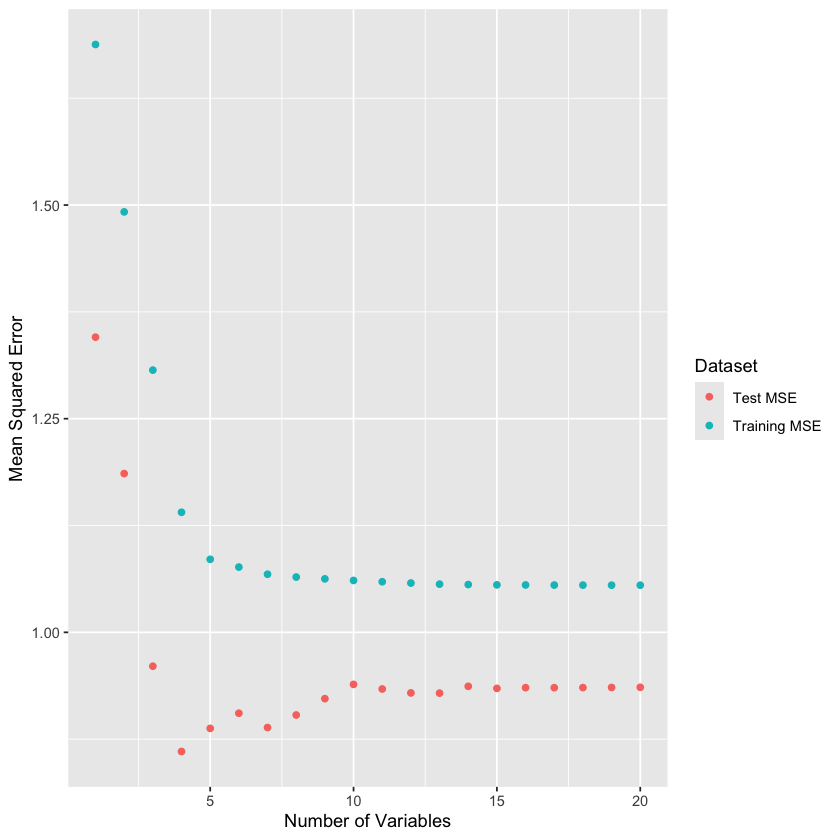

In [ ]:
# WRITE YOUR CODE HERE
regfit <- regsubsets(Y ~ ., data = train_set, nvmax = p)  # Up to 20 predictors

# Summarize regsubsets
regfit_summary <- summary(regfit)
print(regfit_summary)


# Function to predict using regsubsets object
predict_regsubsets <- function(regfit_obj, newdata, idx) {
  formula <- as.formula(regfit_obj$call[[2]]) # get the formula of the model
  model_matrix <- model.matrix(formula, newdata)
  coef <- coef(regfit_obj, idx)
  predictors <- names(coef)
  return(model_matrix[, predictors] %*% coef)
}

# Initialize vectors to store MSE
train_mse <- numeric(p)
test_mse <- numeric(p)

# Loop through models of different sizes
for (i in 1:p) {
  # Training set predictions and MSE
  train_pred <- predict_regsubsets(regfit, train_set, id = i)
  train_mse[i] <- mean((train_set$Y - train_pred)^2)

  # Test set predictions and MSE
  test_pred <- predict_regsubsets(regfit, test_set, id = i)
  test_mse[i] <- mean((test_set$Y - test_pred)^2)
}


# Create a data frame for plotting
mse_df <- data.frame(numvar = 1:p, Train_MSE = train_mse, Test_MSE = test_mse)
# mse_df$Test_MSE_min[which.min(mse_df$Test_MSE)] <- TRUE

# Plot training and test MSE
ggplot(mse_df, aes(x = numvar)) +
  geom_point(aes(y = Train_MSE, color = "Training MSE")) +
  geom_point(aes(y = Test_MSE, color = "Test MSE")) +
  labs(x = "Number of Variables", y = "Mean Squared Error", color = "Dataset")



c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
# WRITE YOUR CODE HERE
best_model_size <- which.min(test_mse)
print(paste0("Best model size according to test MSE: ", best_model_size))
best_model_coefficients <- coef(regfit, id = best_model_size)
print("Coefficients of the best model: ")
print(best_model_coefficients)




[1] "Best model size according to test MSE: 4"
[1] "Coefficients of the best model: "
(Intercept)          X1          X3          X4          X5 
 0.06498333  0.40984451  0.39628946 -0.44077504 -0.98969351 


> *Write your response here*
>

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> I had to consult online resources including Stackoverflow and Microsoft Copilot to identify the right attributes to call for the regfit objects.